Импортируем библиотеки

In [1]:
import numpy
import matplotlib.pyplot as pyplot

Функция для генерации синусоиды и точек, расположенных около неё

In [2]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    data["x_support"] = numpy.linspace(0, 2*numpy.pi, num=n_support)
    data["y_support"] = numpy.sin(data["x_support"]) + 1
    data["x_train"] = numpy.sort(numpy.random.choice(data["x_support"], size=n_train, replace=True))
    data["y_train"] = numpy.sin(data["x_train"]) + 1 + numpy.random.normal(0, std, size=data["x_train"].shape[0])
    return data

Генерация синусоиды и точек с заданными параметрами

In [3]:
data = generate_wave_set(1000, 250)

Добавление колонки единиц к единственному столбцу признаков, считаем прогноз

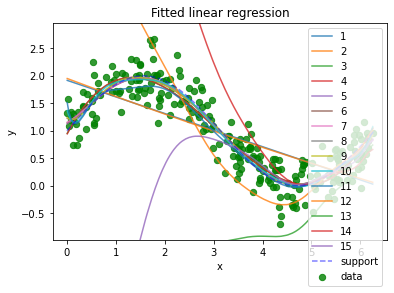

In [4]:
margin = 0.3
for p in range(1, 16):
    calculated_x = [numpy.ones(data["x_train"].shape[0])] + [data["x_train"]**i for i in range(1, p + 1)]
    X = numpy.array(calculated_x).T
    w = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X.T, X)), X.T), data["y_train"])
    y_prediction = numpy.dot(w, X.T)

    pyplot.plot(data["x_train"], y_prediction, alpha=0.8, label=p)
    
pyplot.plot(data["x_support"], data["y_support"], "b--", alpha=0.5, label="support")
pyplot.scatter(data["x_train"], data["y_train"], 40, "g", "o", alpha=0.8, label="data")
pyplot.xlim(data["x_train"].min() - margin, data["x_train"].max() + margin)
pyplot.ylim(data["y_train"].min() - margin, data["y_train"].max() + margin)
pyplot.legend(loc="upper right", prop={"size": 10})
pyplot.title("Fitted linear regression")
pyplot.xlabel("x")
pyplot.ylabel("y")
pyplot.show()